In [1]:
%matplotlib inline

import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time

mpl.style.use("classic")
mpl.rcParams["figure.figsize"] = [5, 3]

mpl.rcParams["axes.linewidth"] = 0.75
mpl.rcParams["grid.linewidth"] = 0.75
mpl.rcParams["lines.linewidth"] = 0.75
mpl.rcParams["patch.linewidth"] = 0.75
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.size"] = 7
mpl.rcParams["axes.titlesize"] = "medium"
mpl.rcParams["legend.fontsize"] = "medium"

print("matplotlib %s" % mpl.__version__)

from bandits.simulator import *
from bandits.algorithms import *
from bandits.phe import *
from bandits.hse import *

def linestyle2dashes(style):
  if style == "--":
    return (3, 3)
  elif style == ":":
    return (0.5, 2.5)
  else:
    return (None, None)

matplotlib 3.0.2


In [ ]:
import datetime

algs = [
  #("UCB1", {}, "cyan", "-", "UCB1"),
  #("KLUCB", {}, "blue", "-", "KL-UCB"),
  #("TS", {}, "gray", "-", "TS"),
  #("Giro", {}, "greenyellow", "-", "Giro"),
  #("FPL", {}, "green", "-", "FPL"),
  #("PHE", {"a": 2.1}, "red", "-", "PHE (a = 2.1)"),
  #("PHE", {"a": 1.1}, "darkorange", "-", "PHE (a = 1.1)"),
  ("PHE", {"a": 0.5}, "gold", "-", "PHE (a = 0.5)"),
  #("HistorySwapping", {"swap_prob": 0.}, "gray", "-", "HS (swap_prob = 0.)"),
  #("HistorySwapping", {"swap_prob": 0.01}, "darkgreen", "-", "HS (swap_prob = 0.01)"),
  ("HistorySwapping", {"swap_prob": 0.05}, "red", "-", "HS (swap_prob = 0.05)"),
  ("HistorySwapping", {"swap_prob": 0.1}, "blue", "-", "HS (swap_prob = 0.1)"),
  #("HistorySwapping", {"swap_prob": 0.02}, "black", "-", "HS (swap_prob = 0.02)"),
  ("FreshHistorySwapping", {"swap_prob": 0.01}, "blue", "-", "FHS (swap_prob = 0.01)"),
  ("FreshHistorySwapping", {"swap_prob": 0.02}, "red", "-", "FHS (swap_prob = 0.02)"),
  #("FreshHistorySwapping", {"swap_prob": 0.03}, "darkgreen", "-", "FHS (swap_prob = 0.03)"),
  #("EpsilonGreedy", {}, "darkgreen", "-", "EpsilonGreedy"),
  #("DropoutExploration", {}, "blue", "-", "Dopout (drop_prob = epsilon)"),
  #("DropoutExploration", {"drop_prob": 0.1}, "red", "-", "Dopout (drop_prob = 0.1)"),
  #("DropoutExploration", {"drop_prob": 0.15}, "cyan", "-", "Dopout (drop_prob = 0.15)"),
]
num_runs = 5
n = 10000
K = 10

step = np.arange(1, n + 1)
sube = (step.size // 10) * np.arange(1, 11) - 1

plt.figure(figsize=(5.5, 2))
for fig in range(2):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(BerBandit(mu))
    else:
      env.append(BetaBandit(mu))

  plt.subplot(1, 2, fig + 1)
  #plt.subplot(1, 1, 1)
  alg_num = 0
  for alg in algs:
    alg_class = globals()[alg[0]]
    regret, _ = evaluate(alg_class, alg[1], env, n)

    cum_regret = regret.cumsum(axis=0)
    plt.plot(step, cum_regret.mean(axis=1),
      alg[2], dashes=linestyle2dashes(alg[3]),
      label=alg[4] if alg_num // 3 == fig else None)
    plt.errorbar(step[sube], cum_regret[sube, :].mean(axis=1),
      cum_regret[sube, :].std(axis=1) / np.sqrt(cum_regret.shape[1]),
      fmt="none", ecolor=alg[2])

    alg_num += 1

  if fig == 0:
    plt.title("Bernoulli bandit")
  else:
    plt.title("Beta bandit")
  plt.xlabel("Round n")
  if not fig:
    plt.ylabel("Regret")
  #plt.ylim(0, 400)
  if fig <= 1:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()
now = datetime.datetime.now()
with open("results/FHS_{}_{}.jpeg".format(now.hour, now.minute), "wb") as f:
  plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()

Evaluating Histroy-Swapping.............................. 8.2 seconds
Regret: 288.23 +/- 133.71 (median: 9.00, max: 3549.00, min: 6.00)
Evaluating Histroy-Swapping.............................. 7.3 seconds
Regret: 89.63 +/- 47.91 (median: 9.00, max: 1299.00, min: 4.00)
Evaluating Histroy-Swapping.............................. 7.3 seconds
Regret: 284.80 +/- 120.83 (median: 10.00, max: 3336.00, min: -56.00)
Evaluating Histroy-Swapping.............................. 7.7 seconds
Regret: 264.40 +/- 126.80 (median: 13.00, max: 3574.00, min: 7.00)
Evaluating Histroy-Swapping.............................. 10.1 seconds
Regret: 57.43 +/- 21.76 (median: 19.00, max: 584.00, min: -32.00)
Evaluating Histroy-Swapping.............................. 13.0 seconds
Regret: 60.17 +/- 11.96 (median: 32.00, max: 250.00, min: 18.00)
Evaluating Histroy-Swapping.............................. 18.9 seconds
Regret: 78.90 +/- 21.84 (median: 45.50, max: 649.00, min: 12.00)
Evaluating Histroy-Swapping..................

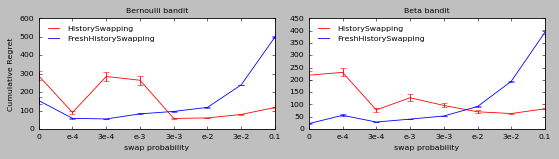

In [4]:
import datetime

swap_probs = [0, 1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2, 0.1]#, 0.12, 0.15, 0.2]
swap_probs_labels = ['0', 'e-4', '3e-4', 'e-3', '3e-3', 'e-2', '3e-2', '0.1'] #\
                     #'4e-2', '5e-2', '8e-2', '0.1', '0.15', '0.12', '0.2']
x_axis = np.arange(len(swap_probs))
num_runs = 30
n = 10000
K = 10

plt.figure(figsize=(7, 2))
algs = ['HistorySwapping', 'FreshHistorySwapping']
colors = {'HistorySwapping':'red', 'FreshHistorySwapping':'blue'}

for fig in range(2):
  env = []
  for run in range(num_runs):
    mu = np.random.rand(K)
    if fig == 0:
      env.append(BerBandit(mu))
    else:
      env.append(BetaBandit(mu))

  plt.subplot(1, 2, fig + 1)
  #plt.subplot(1, 1, 1)

  for alg in algs:
    alg_class = globals()[alg]
    regret_means = []
    regret_vars = []
    for swap_prob in swap_probs:
        regret, _ = evaluate(alg_class, {"swap_prob": swap_prob}, env, n)
        cum_regret = regret.sum(axis=0)
        regret_means.append(cum_regret.mean())
        regret_vars.append(cum_regret.std()/num_runs)
        
    plt.plot(x_axis, regret_means, colors[alg], dashes=linestyle2dashes('-'), label=alg)
    plt.errorbar(x_axis, regret_means, regret_vars, fmt="none", ecolor=colors[alg])
    plt.xticks(x_axis, swap_probs_labels)
    
  if fig == 0:
    plt.title("Bernoulli bandit")
  else:
    plt.title("Beta bandit")
    
  plt.xlabel("swap probability")
  if not fig:
    plt.ylabel("Cumulative Regret")

  if fig <= 1:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()
now = datetime.datetime.now()
with open("results/FHS_vs_SwapProb_{}_{}_{}_{}.jpeg".format(now.month, now.day, now.hour, now.minute), "wb") as f:
  plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()

Evaluating Histroy-Swapping.................................................. 11.5 seconds
Regret: 142.64 +/- 50.63 (median: 9.00, max: 1621.00, min: 6.00)
Evaluating Histroy-Swapping.................................................. 15.0 seconds
Regret: 305.20 +/- 106.03 (median: 10.00, max: 4338.00, min: 4.00)
Evaluating Histroy-Swapping.................................................. 14.7 seconds
Regret: 125.00 +/- 38.41 (median: 11.00, max: 1207.00, min: 4.00)
Evaluating Histroy-Swapping.................................................. 14.4 seconds
Regret: 233.80 +/- 66.19 (median: 15.00, max: 2558.00, min: 10.00)
Evaluating Fresh Histroy-Swapping.................................................. 9.0 seconds
Regret: 210.02 +/- 73.60 (median: 9.00, max: 3231.00, min: 3.00)
Evaluating Fresh Histroy-Swapping.................................................. 454.0 seconds
Regret: 109.80 +/- 26.53 (median: 25.00, max: 1028.00, min: 15.00)
Evaluating Fresh Histroy-Swapping............

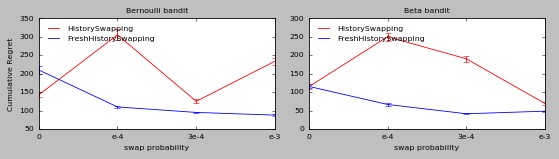

In [6]:
import datetime

swap_probs = [0, 1e-4, 3e-4, 1e-3]#, 3e-3, 1e-2, 3e-2, 0.1]#, 0.12, 0.15, 0.2]
swap_probs_labels = ['0', 'e-4', '3e-4', 'e-3']#, '3e-3', 'e-2', '3e-2', '0.1'] #\
                     #'4e-2', '5e-2', '8e-2', '0.1', '0.15', '0.12', '0.2']
x_axis = np.arange(len(swap_probs))
num_runs = 50
n = 10000
K = 10

plt.figure(figsize=(7, 2))
algs = ['HistorySwapping', 'FreshHistorySwapping']
colors = {'HistorySwapping':'red', 'FreshHistorySwapping':'blue'}

for fig in range(2):
  env = []
  for run in range(num_runs):
    mu = np.random.rand(K)
    if fig == 0:
      env.append(BerBandit(mu))
    else:
      env.append(BetaBandit(mu))

  plt.subplot(1, 2, fig + 1)
  #plt.subplot(1, 1, 1)

  for alg in algs:
    alg_class = globals()[alg]
    regret_means = []
    regret_vars = []
    for swap_prob in swap_probs:
        regret, _ = evaluate(alg_class, {"swap_prob": swap_prob}, env, n)
        cum_regret = regret.sum(axis=0)
        regret_means.append(cum_regret.mean())
        regret_vars.append(cum_regret.std()/num_runs)
        
    plt.plot(x_axis, regret_means, colors[alg], dashes=linestyle2dashes('-'), label=alg)
    plt.errorbar(x_axis, regret_means, regret_vars, fmt="none", ecolor=colors[alg])
    plt.xticks(x_axis, swap_probs_labels)
    
  if fig == 0:
    plt.title("Bernoulli bandit")
  else:
    plt.title("Beta bandit")
    
  plt.xlabel("swap probability")
  if not fig:
    plt.ylabel("Cumulative Regret")

  if fig <= 1:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()
# now = datetime.datetime.now()
# with open("results/FHS_vs_SwapProb_{}_{}_{}_{}.jpeg".format(now.month, now.day, now.hour, now.minute), "wb") as f:
#   plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()

In [2]:
import datetime

swap_probs = [0.1]#, 3e-3, 1e-2, 3e-2, 0.1]#, 0.12, 0.15, 0.2]
swap_probs_labels = ['0.1']#, '3e-3', 'e-2', '3e-2', '0.1'] #\
                     #'4e-2', '5e-2', '8e-2', '0.1', '0.15', '0.12', '0.2']

x_axis = np.arange(len(swap_probs))
num_runs = 100
n = 10000
K = 10

algs = ['HistorySwapping']
colors = {'HistorySwapping':'red'}

for fig in range(2):
  env = []
  for run in range(num_runs):
    mu = np.random.rand(K)
    if fig == 0:
      env.append(BerBandit(mu))
    else:
      env.append(BetaBandit(mu))

  for alg in algs:
    alg_class = globals()[alg]
    regret_means = []
    regret_vars = []
    for swap_prob in swap_probs:
        regret, _ = evaluate(alg_class, {"swap_prob": swap_prob}, env, n)
        regret, all_alg = evaluate_parallel(alg_class, {"swap_prob": swap_prob}, env, n, num_process=10)
        
        # cum_regret = regret.sum(axis=0)
        # regret_means.append(cum_regret.mean())
        # regret_vars.append(cum_regret.std()/num_runs)
        
#     plt.plot(x_axis, regret_means, colors[alg], dashes=linestyle2dashes('-'), label=alg)
#     plt.errorbar(x_axis, regret_means, regret_vars, fmt="none", ecolor=colors[alg])
#     plt.xticks(x_axis, swap_probs_labels)
    
#   if fig == 0:
#     plt.title("Bernoulli bandit")
#   else:
#     plt.title("Beta bandit")
    
#   plt.xlabel("swap probability")
#   if not fig:
#     plt.ylabel("Cumulative Regret")

#   if fig <= 1:
#     plt.legend(loc="upper left", frameon=False)

# plt.tight_layout()
# # now = datetime.datetime.now()
# # with open("results/FHS_vs_SwapProb_{}_{}_{}_{}.jpeg".format(now.month, now.day, now.hour, now.minute), "wb") as f:
# #   plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
# plt.show()

Evaluating Histroy-Swapping.......... 3.6 seconds
Regret: 78.80 +/- 8.99 (median: 66.50, max: 150.00, min: 55.00)
Evaluating Histroy-Swapping.......... 1.7 seconds
[170.  97.  43. 265. 106.  55. 457.  47.  61.  51.]
Regret: 135.20 +/- 39.90 (median: 79.00, max: 457.00, min: 43.00)
Evaluating Histroy-Swapping.......... 6.3 seconds
Regret: 54.46 +/- 8.29 (median: 42.08, max: 124.32, min: 35.39)
Evaluating Histroy-Swapping.......... 2.5 seconds
[34.77386359 30.14248804 40.39881767 37.18818042 31.98227379 66.33658287
 44.6449175  34.39359069 43.74703411 44.79220412]
Regret: 40.84 +/- 3.12 (median: 38.79, max: 66.34, min: 30.14)
